# Importing the Libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [166]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [167]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [168]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [169]:
dataset.shape

(41188, 21)

In [190]:
dataset.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### Separating dataset as numerical and categorical

In [170]:
y = dataset['y']

In [171]:
dataset_numerical = dataset[dataset.select_dtypes(include=['number']).columns].copy()

In [172]:
dataset_categorical = dataset[dataset.select_dtypes(include=['object']).columns].copy()
# Change the object type columns to categorical
object_columns = dataset_categorical.select_dtypes(include=['object']).columns.tolist()
for column in object_columns:
    dataset_categorical[column] = pd.Categorical(dataset_categorical[column])

In [173]:
dataset_numerical.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [174]:
dataset_categorical.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
y              category
dtype: object

## Exploring the dataset

#### Exploring the numerical features

In [175]:
def visualize_features(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, kde=True, color='skyblue')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [176]:
def visualize_target_feature(df_x, df_y,column_name):
    merged_df = df_x.merge(df_y, how='outer', left_index=True, right_index=True).copy()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_df, x=column_name, hue='y', multiple='stack', palette='Set2') 
    plt.title(f"Distribution of 'y' within {column_name} Groups") 
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [177]:
def visualize_outliers(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name} (with Outliers)")
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

In [178]:
def remove_outliers_by_quantiles(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

##### 1-) "Age"

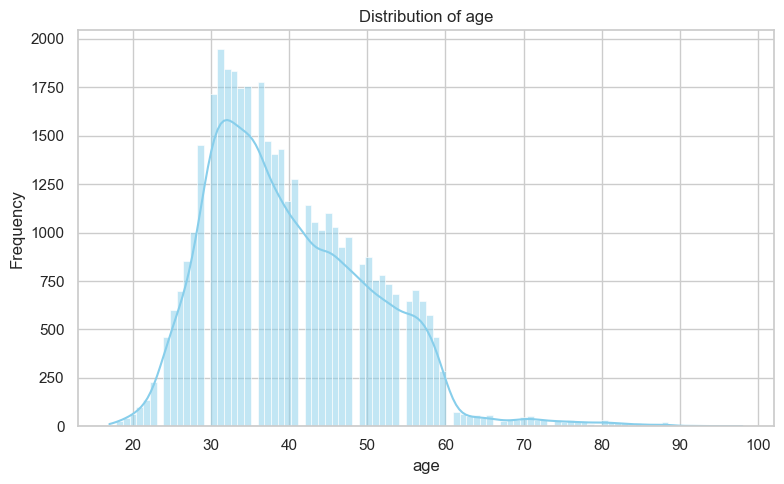

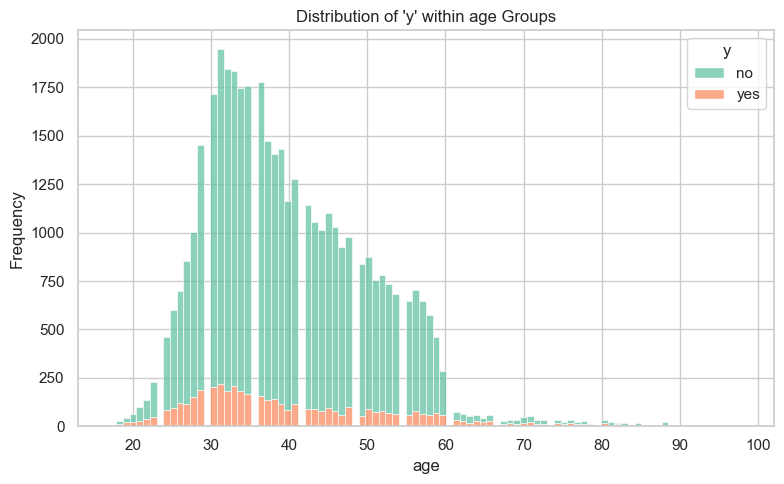

In [179]:
visualize_features(dataset_numerical,'age')
visualize_target_feature(dataset_numerical,y,'age')

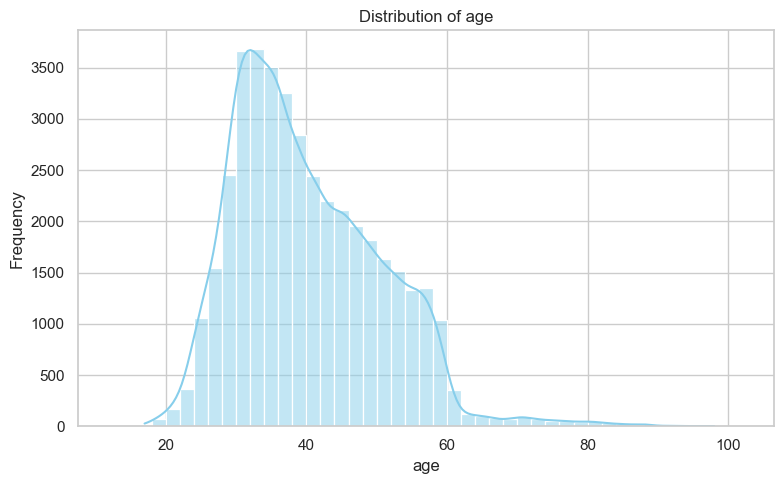

In [180]:
# Create age bins in 2-year intervals starting from 10
bins = list(range(min(dataset_numerical['age'] - 5), max(dataset_numerical['age']) + 5, 2))


plt.figure(figsize=(8, 5))
sns.histplot(data=dataset_numerical, x='age', bins=bins, kde=True, color='skyblue')
plt.title(f"Distribution of age")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

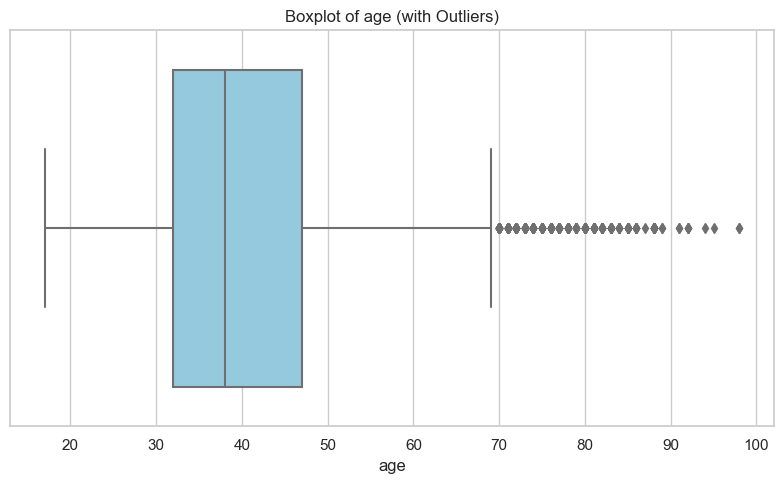

In [181]:
visualize_outliers(dataset_numerical,'age')

In [182]:
remove_outliers_by_quantiles(dataset_numerical,'age')

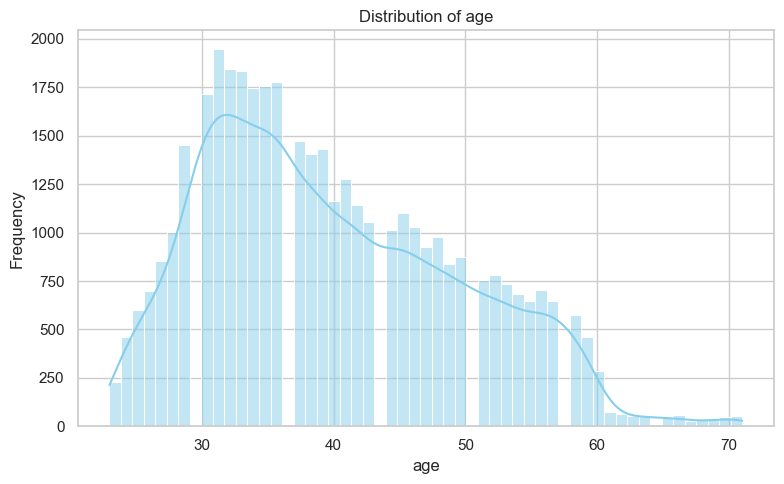

In [185]:
visualize_features(dataset_numerical,'age')

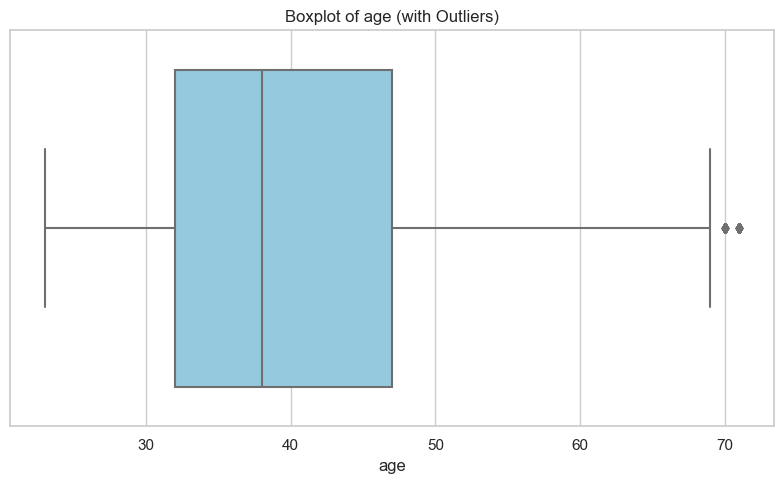

In [184]:
visualize_outliers(dataset_numerical,'age')

In [193]:
dataset_numerical['age'].describe()

count    40440.000000
mean        39.852671
std          9.653335
min         23.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         71.000000
Name: age, dtype: float64